# Credit Card Fraud Detection

Machine learning is a powerful tool for solving complex problems that involve data analysis and prediction. One of the common applications of machine learning is regression, which is the task of estimating the relationship between variables and predicting continuous outcomes. In this project, we will use machine learning to perform regression on a dataset of credit card transactions and detect fraudulent activities. The dataset contains 284,807 transactions made by European cardholders in September 2013, of which 492 were frauds. The dataset has 30 features, most of which are numerical and have been transformed using principal component analysis (PCA) for confidentiality reasons. The only features that have not been transformed are Time and Amount. The target variable is Class, which is 1 for fraud and 0 for normal.


![creditcard](creditcard.jpg)

Source: https://shorturl.at/jtUV4

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')


%matplotlib inline

In [43]:
df = pd.read_csv('creditcard.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [45]:
df.shape

(284807, 31)

In [46]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [47]:
df.duplicated().sum()

1081

In [48]:
df.drop_duplicates(keep=False, inplace=True)

In [49]:
df.shape

(282953, 31)

Text(0.5, 1.0, 'Distrubution of transactions')

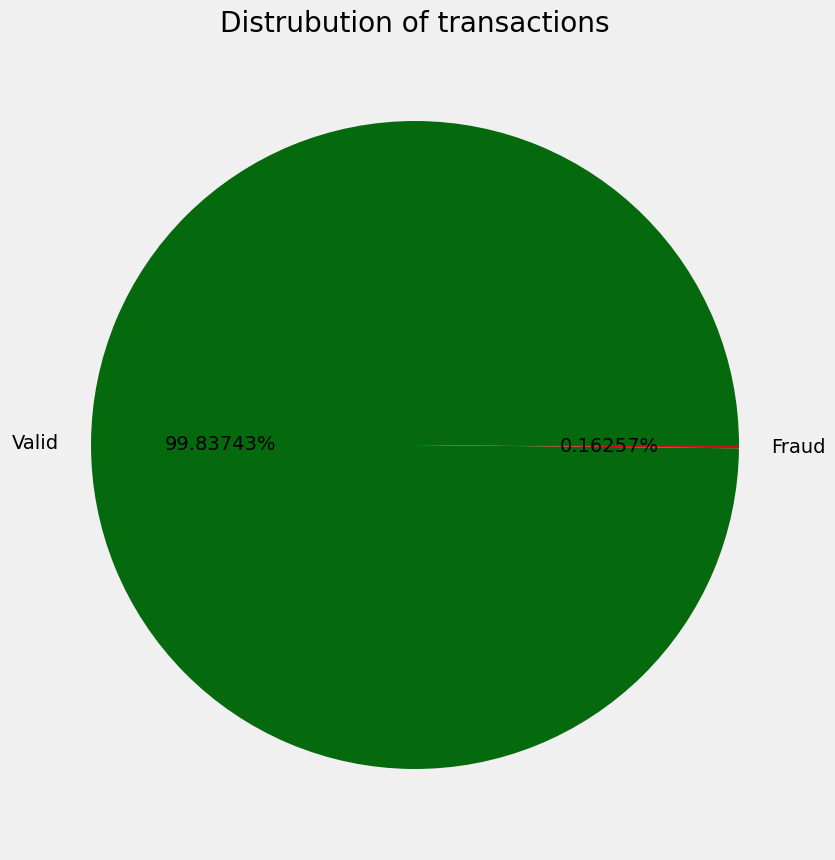

In [50]:
counts_df = df[['Class']].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(counts_df, labels=['Valid', 'Fraud'], autopct='%1.5f%%', colors=['#05690e', '#d90711'])

plt.title('Distrubution of transactions')


In [51]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [52]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y) # type: ignore

Text(0.5, 1.0, 'Distrubution of transactions')

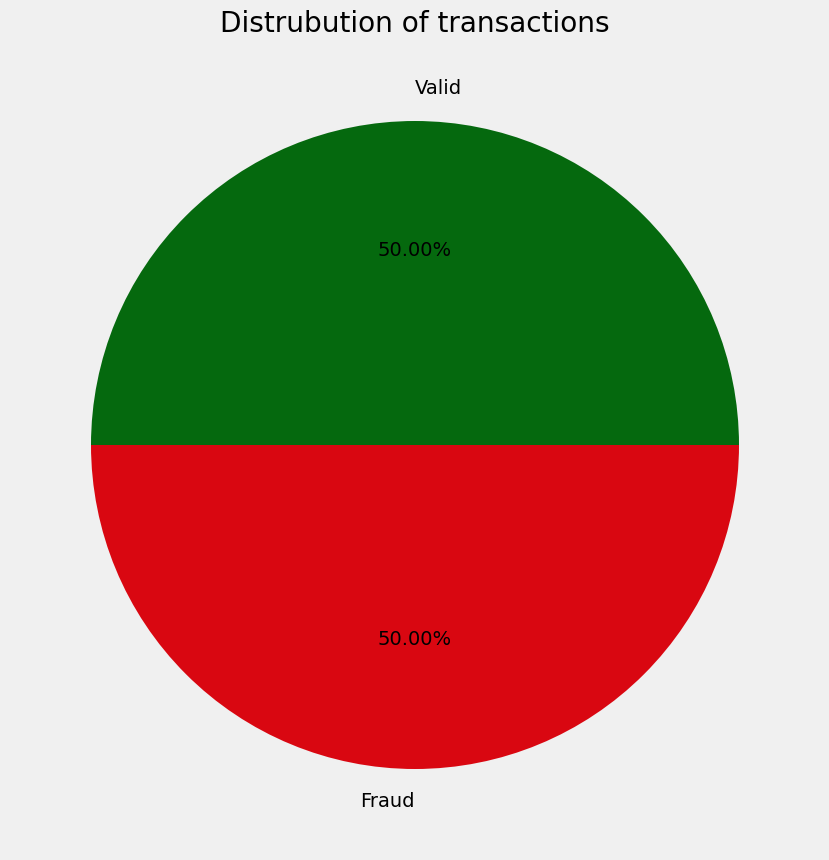

In [53]:
counts_df = y_resampled.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(counts_df, labels=['Valid', 'Fraud'], autopct='%1.2f%%', colors=['#05690e', '#d90711'])

plt.title('Distrubution of transactions')


Text(0.5, 1.0, 'Correlation Matrix')

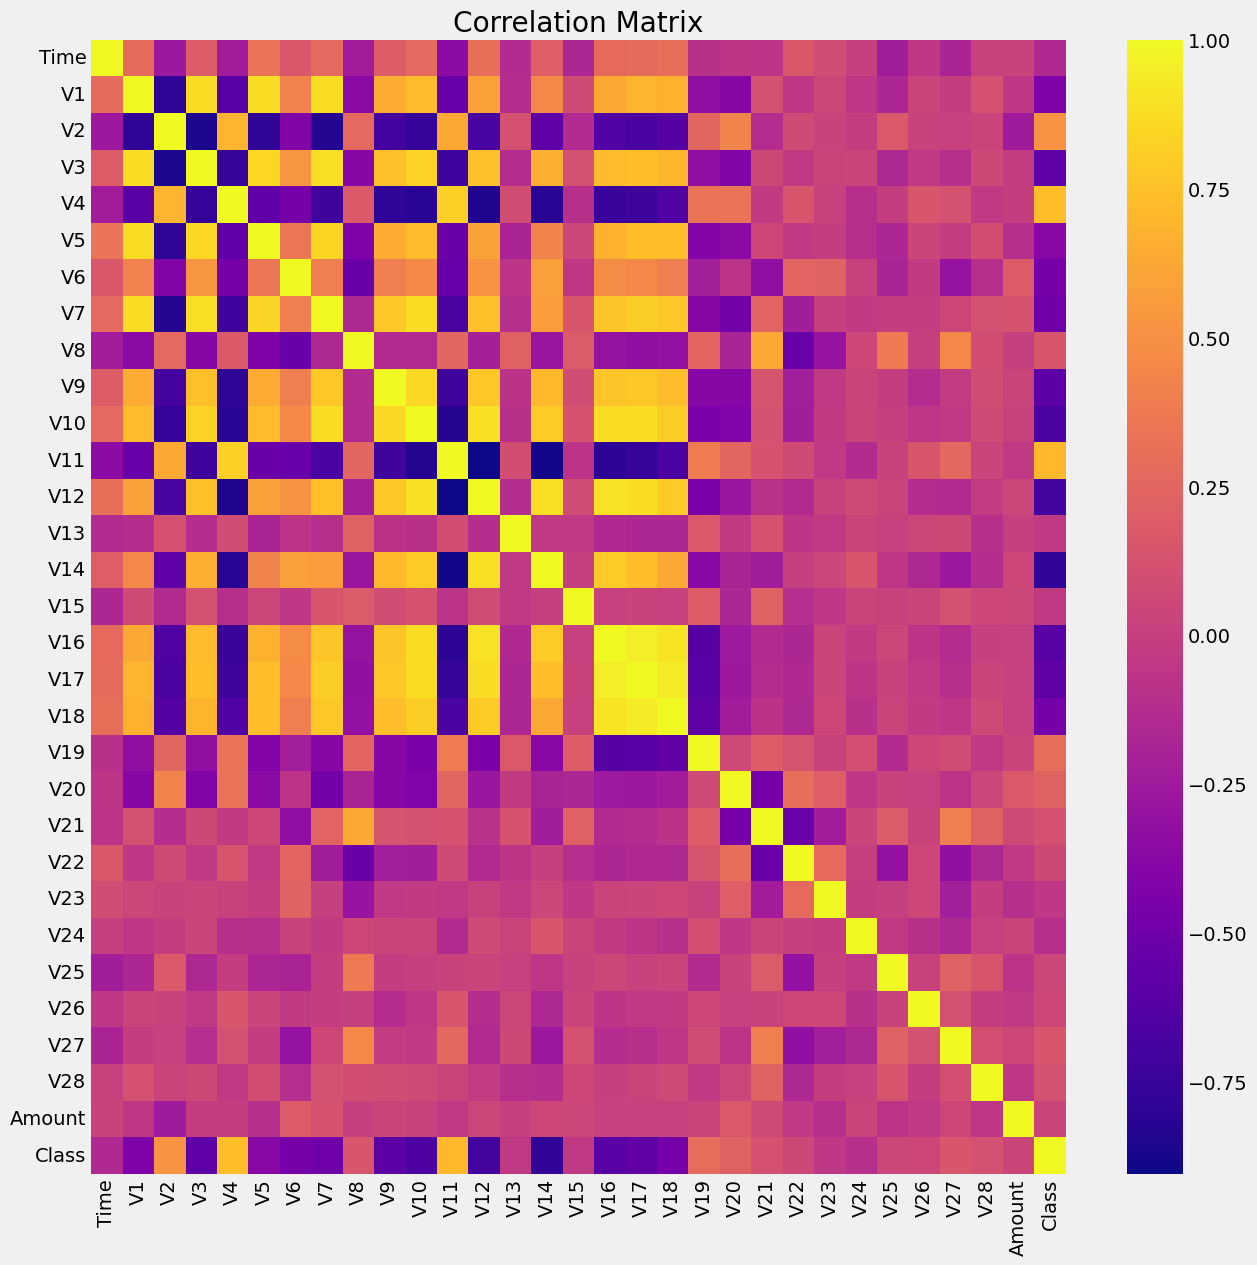

In [54]:
new_df = X_resampled.copy()
new_df['Class'] = y_resampled

corr = new_df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, cmap='plasma')
plt.title('Correlation Matrix')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=0)

In [56]:
clf = RandomForestClassifier()

In [58]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56346
           1       1.00      1.00      1.00     56652

    accuracy                           1.00    112998
   macro avg       1.00      1.00      1.00    112998
weighted avg       1.00      1.00      1.00    112998

